# Species Classification with the Palmer Penguins Dataset
## 1. Using Classification Models to Distinguish Penguin Species From the Islands of Palmer Archipelago, Antarctica

by Kristen Ngo

The following project uses data cleaning techniques, exploratory data analysis, and k-Nearest Neighbors and Random Forests classification models in order to accurately distinguish between penguin species from the islands of Palmer Archipelago, Antarctica. The limitations are that exactly 1 qualitative feature and 2 quantitative features must be utilized in the modeling.

[Palmer Penguins Dataset - UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/690/palmer+penguins-3)

## 2. Data Import and Cleaning

In [1]:
# IMPORTING LIBRARIES + PALMER PENGUINS CSV FILE

# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# import palmer penguins data set
from google.colab import drive
drive.mount('/content/drive')
penguins = pd.read_csv("drive/My Drive/palmer_penguins.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# observe rows and columns: original data has 344 rows, 17 columns
penguins.shape

(344, 17)

In [3]:
# preview of original palmer penguins dataset
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [4]:
# checking for duplicates values
penguins.duplicated().sum()

np.int64(0)

In [5]:
# checking for null valuess
penguins.isnull().sum()

,0
studyName,0
Sample Number,0
Species,0
Region,0
Island,0
Stage,0
Individual ID,0
Clutch Completion,0
Date Egg,0
Culmen Length (mm),2


This confirmed that there are no duplicate values. Based on the null values in the table above, there are 2 penguins which have null values across all quantitative variables. Since it is needed to select 2 quantitative features,  columns with NaN values in all the quantitative columns will be dropped. Columns that do not contain relevant information to penguin features, such as Comments, will also be removed.

In [6]:
# drop rows where all numeric values are NaN
quantitative_cols = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]
penguins = penguins.dropna(subset=quantitative_cols, how="all")

In [7]:
# verify that only 2 rows were dropped
penguins.shape

(342, 17)

In [8]:
# drop columns with extra info that are not indicative of penguin features
penguins = penguins.drop(columns = ["studyName", "Sample Number", "Individual ID", "Comments"])

In [9]:
# data types of each column
penguins.dtypes

,0
Species,object
Region,object
Island,object
Stage,object
Clutch Completion,object
Date Egg,object
Culmen Length (mm),float64
Culmen Depth (mm),float64
Flipper Length (mm),float64
Body Mass (g),float64


In [10]:
# data summary of our quantitative (numeric) columns
penguins.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [11]:
# review unique values for all qualitative columns

# select only non-numeric (object or categorical) columns
non_numeric_cols = penguins.select_dtypes(include=['object', 'category']).columns

# get unique values for each non-numeric column
unique_values = {col: penguins[col].unique() for col in non_numeric_cols}

# display the dictionary
unique_values

{'Species': array(['Adelie Penguin (Pygoscelis adeliae)',
        'Chinstrap penguin (Pygoscelis antarctica)',
        'Gentoo penguin (Pygoscelis papua)'], dtype=object),
 'Region': array(['Anvers'], dtype=object),
 'Island': array(['Torgersen', 'Biscoe', 'Dream'], dtype=object),
 'Stage': array(['Adult, 1 Egg Stage'], dtype=object),
 'Clutch Completion': array(['Yes', 'No'], dtype=object),
 'Date Egg': array(['11/11/07', '11/16/07', '11/15/07', '11/9/07', '11/12/07',
        '11/10/07', '11/13/07', '11/19/07', '11/6/08', '11/9/08',
        '11/15/08', '11/13/08', '11/11/08', '11/14/08', '11/8/08',
        '11/2/08', '11/7/08', '11/17/08', '11/5/08', '11/10/08', '11/9/09',
        '11/15/09', '11/20/09', '11/12/09', '11/17/09', '11/18/09',
        '11/22/09', '11/16/09', '11/21/09', '11/23/09', '11/10/09',
        '11/13/09', '11/14/09', '11/26/07', '11/21/07', '11/28/07',
        '11/22/07', '11/30/07', '12/3/07', '11/25/08', '11/24/08',
        '11/27/09', '11/19/09', '11/27/07', '1

**Unique Species**: Adelie, Chinstrap, Gentoo

**Unique Islands**: Torgersen, Biscoe, Dream

**Region:** All penguins belong to the Anver region.

**Stage:** All penguins are Adult, 1 Egg Stage; born in November.

Therefore, Region or Stage will not be taken into consideration for the exploratory analysis, since there is only one unique value for both of those columns in which all species contain that value.

## 3. Exploratory Analysis

In [12]:
# FIRST: shorten species name for simplicity in code and figure legends
penguins.loc[:,"Species"] = penguins["Species"].str.split().str.get(0)

# make a list of unique species to utilize in all exploratory analysis figures
species_list = penguins["Species"].unique()

#### Exploratory Analysis: Tables

##### Figure 1, Table 1: Penguin Sex grouped by Species & Island

In [13]:
# view the proportion of male to female penguins for island/species groups
penguins.groupby(['Species', 'Island'])[['Sex']].value_counts()

Species    Island     Sex   
Adelie     Biscoe     FEMALE    22
                      MALE      22
           Dream      MALE      28
                      FEMALE    27
           Torgersen  FEMALE    24
                      MALE      23
Chinstrap  Dream      FEMALE    34
                      MALE      34
Gentoo     Biscoe     MALE      61
                      FEMALE    58
                      .          1
Name: count, dtype: int64

**Figure 1, Table 1:** In order to determine which quantitative variable to select, it is important to examine each of the quantitative columns to identify any possible patterns.

The first important piece of information that can be drawn from this table is that the Chinstrap species is unique to Dream Island, and the Gentoo species is unique to Biscoe Island. Furthermore, Adelie penguins are the only inhabitants of Torgersen Island but can be found on all three islands. 'Island' was originally estimated to be a potential quantitative feature because certain penguin species appear to be native to specific islands. This grouped table confirms that 'Island' is a powerful identifier of penguin species, because having the island name automatically narrows the options to two species: either Adelie vs. Chinstrap or Adelie vs. Gentoo. Meanwhile, if the island is Torgersen, the species of the penguin can be identified with certainty as Adelie.

When viewing penguin sex grouped by species and island, there is roughly a 1:1 ratio of males to females across all penguin species in each island location. While this is expected in nature, it is important to analyze this quantitative feature in the dataset since the analysis is based on samples from the Palmer Penguins dataset. In this case, verifying the distribution of penguin sex across different species confirms the 1:1 ratio of males to females. Therefore, this indicates that 'Island' may be a better quantitative feature, as penguin sex is not indicative of species.

##### Figure 2, Table 2: Clutch Completion by Species & Island

In [14]:
# view Clutch Completion separated by species & island
penguins.groupby(["Species", "Clutch Completion"])[['Island']].value_counts()

Species    Clutch Completion  Island   
Adelie     No                 Torgersen      8
                              Dream          4
                              Biscoe         2
           Yes                Dream         52
                              Torgersen     43
                              Biscoe        42
Chinstrap  No                 Dream         14
           Yes                Dream         54
Gentoo     No                 Biscoe         7
           Yes                Biscoe       116
Name: count, dtype: int64

**Figure 2, Table 2:** Similar to analyzing the 'Sex' column for all penguins across species and location, it is also possible to check whether 'Clutch Completion' is an important quantitative variable to help single out the best option. As shown in the table, 'Yes' and 'No' values in Clutch Completion are apparent across all penguin species and locations, with each species having a majority 'Yes'. However, since all penguin species share similar values in Clutch Completion and the species of a penguin is unknown, 'Clutch Completion' is unlikely to be indicative of penguin species, which continues to point toward 'Island'.

Figure 2, Table 3: Mean Quantitative Features Grouped by Species & Island

In [15]:
# mean measurements grouped by species and island
penguins.groupby(["Species", "Island"])[["Culmen Length (mm)", "Culmen Depth (mm)",
                                        "Flipper Length (mm)", "Body Mass (g)",
                                        "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]].aggregate(["mean", "std"])

Culmen Length (mm)           Culmen Depth (mm)            \
                                  mean       std              mean       std   
Species   Island                                                               
Adelie    Biscoe             38.975000  2.480916         18.370455  1.188820   
          Dream              38.501786  2.465359         18.251786  1.133617   
          Torgersen          38.950980  3.025318         18.429412  1.339447   
Chinstrap Dream              48.833824  3.339256         18.420588  1.135395   
Gentoo    Biscoe             47.504878  3.081857         14.982114  0.981220   

                    Flipper Length (mm)           Body Mass (g)              \
                                   mean       std          mean         std   
Species   Island                                                              
Adelie    Biscoe             188.795455  6.729247   3709.659091  487.733722   
          Dream              189.732143  6.585083   3688.392857  455.146437   
          Torgersen          191.196078  6.232238   3706.372549  445.107940   
Chinstrap Dream              195.823529  7.131894   3733.088235  384.335081   
Gentoo    Biscoe             217.186992  6.484976   5076.016260  504.116237   

                    Delta 15 N (o/oo)           Delta 13 C (o/oo)            
                                 mean       std              mean       std  
Species   Island                                                             
Adelie    Biscoe             8.823593  0.382470        -25.918702  0.546280  
          Dream              8.948276  0.422908        -25.747446  0.597462  
          Torgersen          8.792753  0.461072        -25.757806  0.613419  
Chinstrap Dream              9.356155  0.368720        -24.546542  0.238809  
Gentoo    Biscoe             8.245338  0.264470        -26.185298  0.538554

**Figure 2, Table 3:** When analyzing numeric values grouped by species and island, several important observations can be made:

First, the Adelie penguin has a notably smaller average culmen length of about 39mm, while Chinstrap and Gentoo penguins share a similar average culmen length of 47–48mm. This is important because the main issue in species identification is distinguishing an Adelie penguin from another species, since Adelie penguins are found on all three islands. The fact that the average Adelie culmen length is notably shorter can help narrow down the species even further.

For culmen depth, Adelie and Chinstrap penguins both average roughly 18mm, whereas Gentoo penguins have a smaller average culmen depth at 14mm. While it is less important to note the difference in culmen depth between Gentoo and Chinstrap penguins, since they are unique to their respective islands,the difference between Gentoo and Adelie is significant, as it allows for species distinction on Biscoe Island.

Adelie penguins have the shortest average flipper length, closely followed by Chinstrap. Gentoo penguins have a notably longer average flipper length. This means both flipper length and culmen depth are key identifiers between Gentoo and Adelie.

Adelie and Chinstrap penguins also share a similar average body mass at roughly 3,700 grams, while Gentoo penguins are much heavier on average at roughly 5,000 grams, once again providing a possible identifier between Adelie and Gentoo penguins. However, the standard deviation of body mass is relatively large, indicating that body mass may fluctuate more than other features and may not be as reliable.

Carbon and Nitrogen isotope averages and standard deviations are very similar across all species. Compared to the other differences observed, these isotopes are the least likely to be indicative of penguin species.

#### Exploratory Analysis: Barcharts or Boxplots

Figure 2: Boxplot of Body Mass by Species

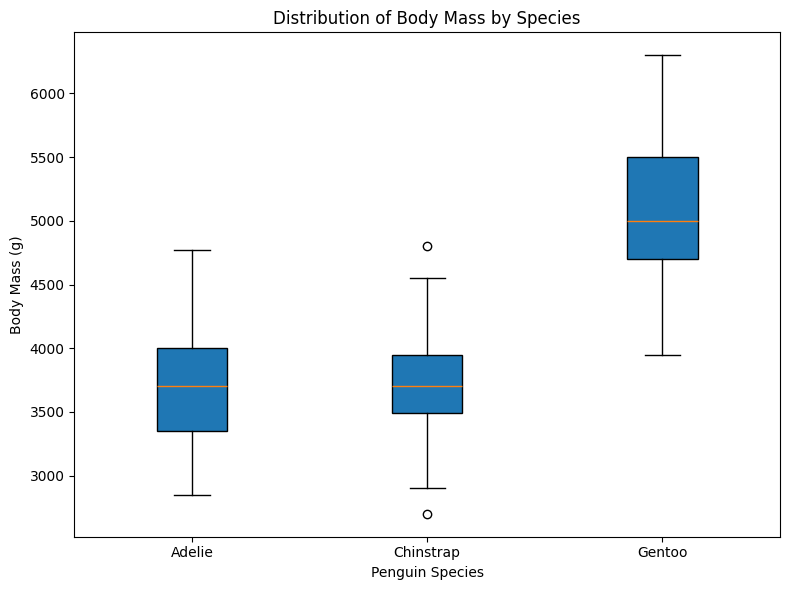

In [16]:
# use a boxplot to view the distribution of body mass by species

# loop through each species' body mass individually to prevent ValueError
species = penguins["Species"].unique()
data = [penguins[penguins['Species'] == sp]['Body Mass (g)'].dropna() for sp in species]

# create boxplot figure
plt.figure(figsize=(8, 6))
plt.boxplot(data, tick_labels=species, patch_artist=True)

# set title and axis labels/settings
plt.title('Distribution of Body Mass by Species')
plt.xlabel('Penguin Species')
plt.ylabel('Body Mass (g)')

# display the boxplot
plt.tight_layout()
plt.show()

**Figure 2**:
Explanation -
This boxplot shows the distribution of body mass of the three penguin species. Gentoo penguins have a significantly higher median body mass compared to Adelie and Chinstrap, allowing for easier identification. The overlap in ranges of Adelie and Chinstrap limits the ability to distinguish the two species based on body mass. Some species have wider spread as seen in the display of their interquartile range, suggesting greater distrbution within the groups. Overall, body mass can be used to identify Gentoo easier, but it is not effective for Adelie and Chinstrap.

#### Exploratory Analysis: Histograms

Figure 3: Density of Culmen Length, Separated by Species

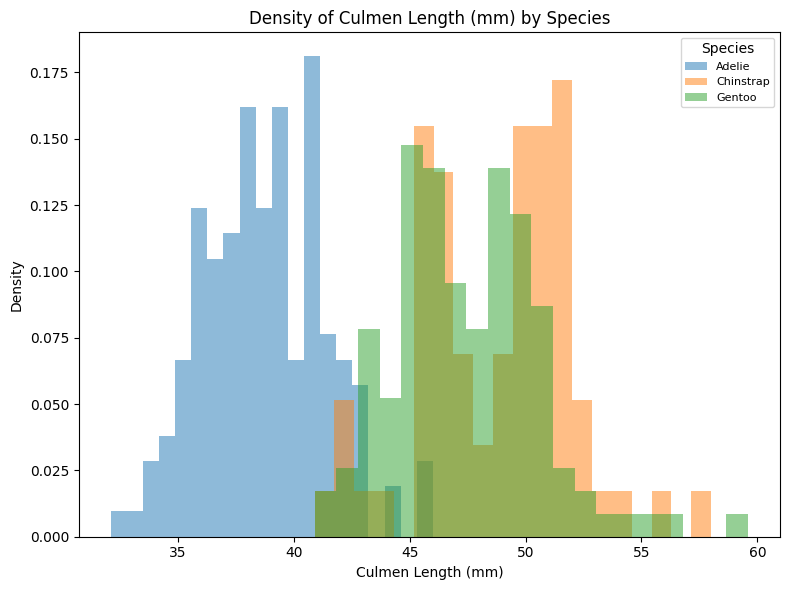

In [17]:
# culmen length density histograms, separated by species

# create the figure
plt.figure(figsize=(8, 6))

# iterate through each species & display histogram distribution of culmen length
for species in species_list:
    subset = penguins[penguins['Species'] == species]
    plt.hist(subset['Culmen Length (mm)'], bins=20, alpha=0.5, label=species, density=True)

# set the title and axis labels/settings
plt.title('Density of Culmen Length (mm) by Species')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Density')
plt.legend(title='Species', fontsize=8)

# display the histograms
plt.tight_layout()
plt.show()


**Figure 3**: All species have overlap in culmen length, with Chinstrap and Gentoo sharing significant overlap between roughly 42 and 57mm overlap. Meanwhile, Adelie penguins typically have shorter culmen length of roughly 30mm to 45mm, which is a relatively small overlap compared to the other two species. Once again, this demonstrates that culmen length is a good identifier of Adelie penguins, which is the main identification challenge on Dream and Biscoe Island.

#### Exploratory Analysis: Scatter Plots

##### Figure 4: Scatter Plot Grid of All Quantitative Variables, Colored by Species & Island

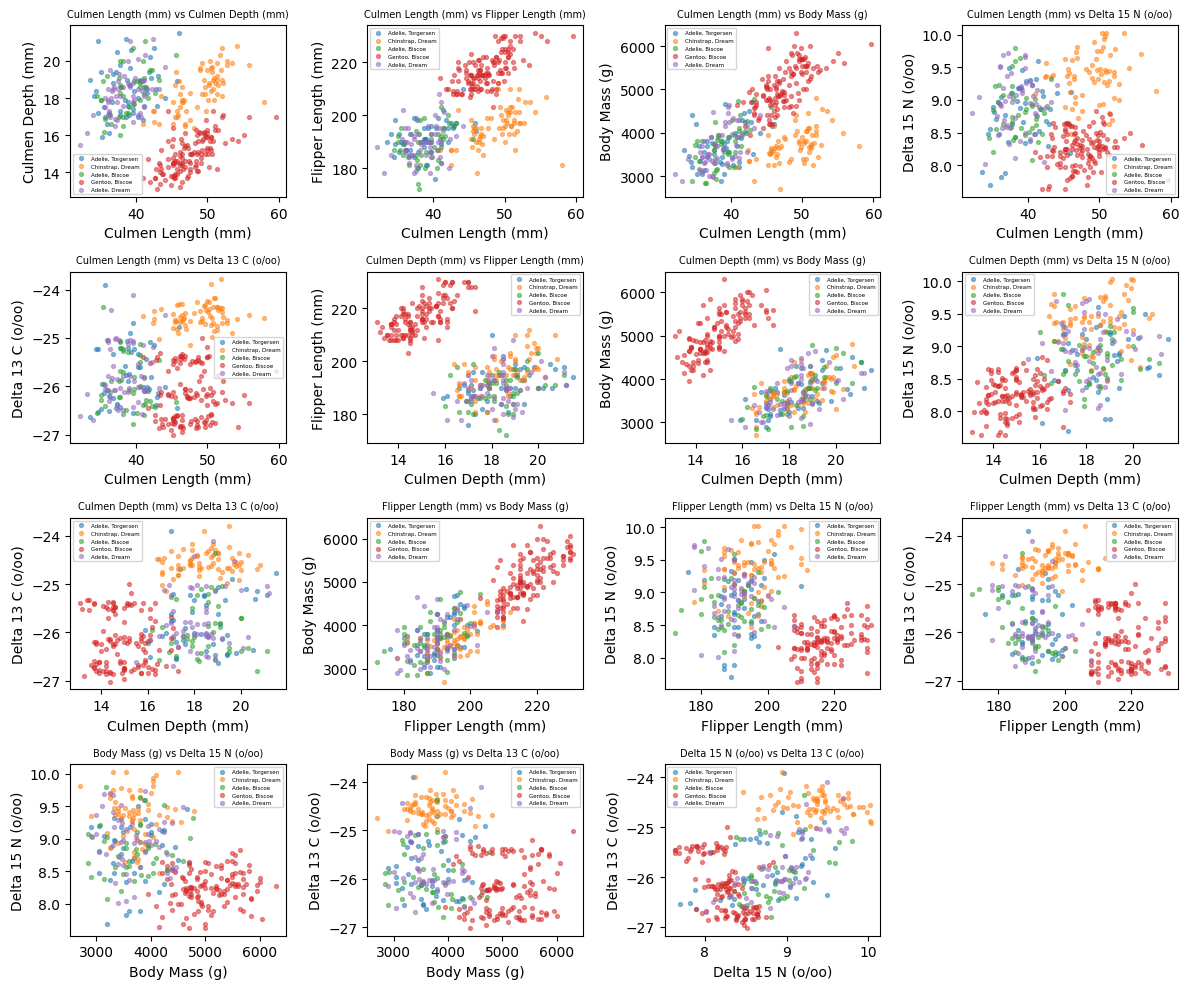

In [18]:
# scatter plot grid of all unique scatter plots, without duplicates/mirrored plots
# used as a better replacement for the original scatterplot_matrix,
  # which had duplicates when the x,y axis were swapped
  # and also had blank plots whenver we compared the variable against itself

def scatter_plots_grid(data, cols, figsize=(12, 10)):
    """
    Creates a grid layout of scatter plots for each unique (X,Y) pair.

    Parameters:
    data: pandas dataframe containing the dataset
    cols: list of column names for scatter plots
    figsize: tuple (width, height) for figure size

    Returns: Displays the scatter plot grid
    """
    # get unique (X,Y) pairs to prevent duplicates and comparing variables against themself
    unique_pairs = list(itertools.combinations(cols, 2)) # use itertools to get unique pairs
    n_plots = len(unique_pairs)

    # calculate the grid size to optimally fit all the subplots for easier display
    grid_size = math.ceil(math.sqrt(n_plots))

    # create the figure and axes depending on the grid size
    fig, axes = plt.subplots(grid_size, grid_size, figsize=figsize)
    axes = axes.flatten()  # flatten to easily index subplots

    # create a species & locations subcategory to allow us to view by both species/location
    data.loc[:, 'Species_Location'] = data['Species'] + ', ' + data['Island']
    species_locations = set(data['Species_Location'])


    # iterate through all unique pairs of columns and set respective axes labels
    for idx, (x_col, y_col) in enumerate(unique_pairs):
        ax = axes[idx]
        ax.set(xlabel=x_col, ylabel=y_col)
        ax.set_title(f"{x_col} vs {y_col}", fontsize=7)

        # iterate through the separated species & locations, then make scatter plot
        for label in species_locations:
            subset = data[data['Species_Location'] == label]
            ax.scatter(subset[x_col], subset[y_col], label=label, alpha=0.5, s=8)

        # create legend so we can view the colors highlighting different species/islands
        ax.legend(fontsize=4)

    # hide any extra empty subplots in the grid
    for extra_ax in axes[n_plots:]:
        extra_ax.set_visible(False)

    # display the figure optimally
    plt.tight_layout()
    plt.show()


# viewing all the possible scatter plots of our relevant qualitative columns
cols = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]
scatter_plots_grid(penguins, cols)


**Figure 4**: Constructing a grid of scatter plots that compares all unique pairs of quantitative variables is important because it allows identification of which two quantitative variables combined are most indicative of penguin species. As such, the goal is to identify the pair of quantitative variables that show the most distinct "cluster" separation by species. In other words, the task is to identify the pair that has the best separation of colors.

As expected from previous observations, all variables paired with Culmen Length provide a decent level of cluster separation, once again supporting that Culmen Length is a key identifying feature for Adelie penguins, which is the main difficulty. In particular, the pairs Culmen Length + Culmen Depth and Culmen Length + Flipper Length visually provide the best cluster separation based on inspection.

Any variable paired with Culmen Depth allows distinction between Gentoo penguins and the rest, as supported by observations in Figure 1. However, if Culmen Depth is not paired with either Culmen Length or Flipper Length, then there is hardly a distinct cluster separation for non-Gentoo penguins.

For the remaining plots, there is still some visible separation of Gentoo penguins from the rest, likely because Gentoo penguins have a notably higher average size in Culmen Depth, Flipper Length, and Body Mass (according to Figure 1).

There is a strong positive linear correlation between Body Mass and Flipper Length, but since the focus is on species classification, this pair will not be as helpful in identifying between different species.

## 4. Intro to Selected Models

**Random Forests:** Random forests is a supervised learning algorithm which works by building multiple decision trees during training and combining their outputs to make a final prediction. Each tree in the forest is trained on a different random subset of the data, and at each split within a tree, a random subset of features is considered. This randomness  ensures that the trees are diverse and reduces the risk of overfitting.

Essentially, as predictions are made based on the collective judgment of many trees, Random Forests tend to be more robust and accurate than individual decision trees. The number of trees in the forest and the depth of each tree can be adjusted to optimize performance, and these parameters are often chosen using k-fold cross validation. While Random Forests perform well with large datasets and many features, they may become slower to train and interpret as the number of trees grows.

**k-Nearest Neighbors:**

KNN is a supervised learning algorithm that can be used for classification. It takes a number (k) and looks at the closest k data points to an input. By default, KNN calculates distance using the Euclidean distance method, which is the straight line distance between two points on a plane. Then,  assigns the input to the class that appears most often among those neighbors.
Put simply, the more a specific class surrounds a given input, the more likely it is to be determined of that class. This process is limited by the number of data point neighbors the model is told to look at, which is specifed by k. The value of k must be selected carefully in order to obtain the best predictions, and is often chosen using k-fold cross validation. If using a large data set, the value of k must be large enough to ensure accurate predictions, but can not be too large to where the model can no longer identify significant patterns in the data.

## 5. Feature Selection

Based on exploratory analysis from the tables in Figure 1, the best qualitative feature is 'Island' due to the fact that Torgersen Island only contains Adelie Penguins, Dream Island contains only Chinstrap and Adelie penguins, and Biscoe Island contains only Gentoo and Adelie Penguins.

Given an island name, this leaves the remaining challenge as identifying between Adelie and non-Adelie. The best quantitative features that help with this challenge are namely Culmen Length (since Adelies have notably shorter Culmen Length on average) alongside either Culmen Depth or Flipper Length, as supported by all figures in the exploratory analysis. Culmen Length + Body Mass is also a potential combination, although body mass does have large overlap in its range that may affect performance. The Delta columns were singled out since all penguins have very similar Carbon and Nitrogen isotope counts.

So, the candidate subset of features will be:
1. Island, Culmen Length, Culmen Depth
2. Island, Culmen Length, Flipper Length
3. Island, Culmen Length, Body Mass






In [19]:
# after selecting 2 key qualitative features,
# view a scatter plot of isolated clusters by each species' min & max value
# of that selected feature. Allows us to view level of feature overlap

def isolate_cluster(x_feature, y_feature):
    """
    Creates 3 subplots, one for each species. Each subplot isolates the interval
    to that species' min and max values for the selected features, showing
    overlap of other species within that specified interval.

    Parameters
    Input: x_feature, the 1st selected feature of type string (on x axis)
           y_feature, the 2nd selected feature of type string (on y axis)
    Returns: figure with 3 subplots showing species-specific intervals
    """

    # create figure with 3 subplots, one for each species
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))

    # get min and max values for corresponding feature, group by species
    species_min = penguins.groupby("Species")[[x_feature, y_feature]].min()
    species_max = penguins.groupby("Species")[[x_feature, y_feature]].max()

    for i, target_species in enumerate(species_list):

        # iterate through each of the three unique species
        # get the min/max interval for the current target species
        x_min = species_min.loc[target_species, x_feature]
        x_max = species_max.loc[target_species, x_feature]
        y_min = species_min.loc[target_species, y_feature]
        y_max = species_max.loc[target_species, y_feature]

        # reduce the interval to the min and max values of that species' features
        interval_data = penguins[
            # the x axis interval is between the min and max measurement of x_feature
            (penguins[x_feature] >= x_min) & (penguins[x_feature] <= x_max) &
            # the x axis interval is between the min and max measurement of y_feature
            (penguins[y_feature] >= y_min) & (penguins[y_feature] <= y_max)
        ]

        # plot each species in the current subplot using the specified interval
        for species in species_list:
            species_data = interval_data[interval_data['Species'] == species]

            # highlight the target species differently so we can distinguish from rest
            if species == target_species:
                axes[i].scatter(
                    # set the respective x and y axis for the selected features
                    species_data[x_feature],
                    species_data[y_feature],
                    # adjust labels and display settings
                    alpha=0.5, # view density of points
                    s=20, # adjust point sizes to be smaller
                    label=f'{species} (target)', # label the target species
                )

            # highlight the other 2 non-target species differently so we can
            # view the overlap of species' key features
            else:
                # set axis, labels and display settings differently
                axes[i].scatter(
                    species_data[x_feature],
                    species_data[y_feature],
                    alpha=0.5,
                    s=20,
                    label=species
                )

        # set labels and title for each subplot
        axes[i].set_xlabel(x_feature)
        axes[i].set_ylabel(y_feature)

        # set title to include the interval that we are looking at
        axes[i].set_title(f'{target_species} Interval\n[{x_min:.1f} - {x_max:.1f}, {y_min:.1f} - {y_max:.1f}]')

        axes[i].legend(fontsize=5) # minimize legend font size so we can view plot
        axes[i].grid(True, alpha=0.3) # use a grid for easier viewing comparison

        # set consistent axis limits across all subplots for better comparison
        axes[i].set_xlim(x_min - 1, x_max + 1)
        axes[i].set_ylim(y_min - 0.5, y_max + 0.5)

    # display the figure
    plt.tight_layout()
    plt.show()

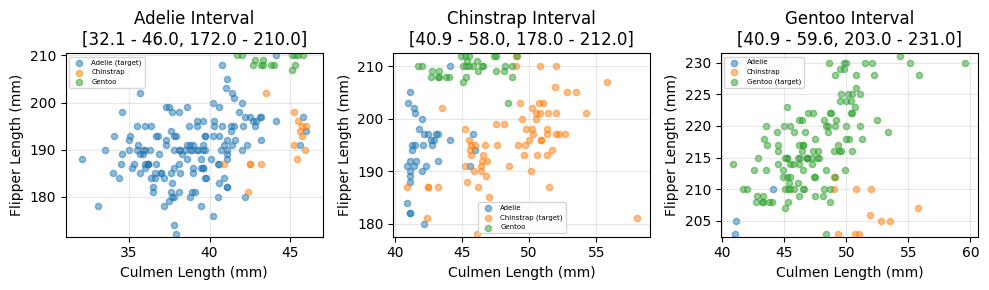

In [20]:
# isolate the scatter plot clusters by culmen length and flipper length
isolate_cluster("Culmen Length (mm)", "Flipper Length (mm)")

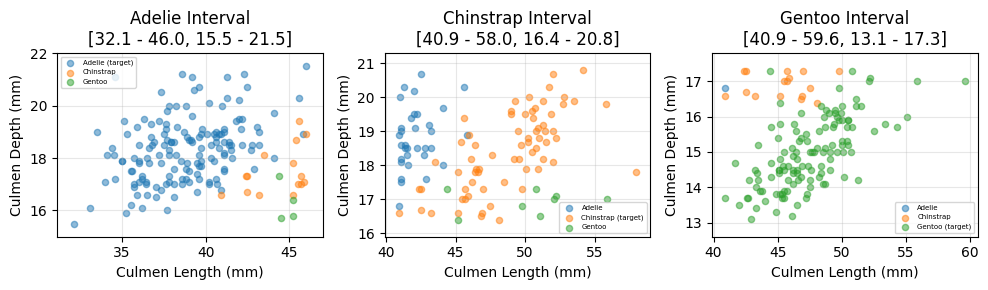

In [21]:
# isolate the scatter plot clusters by culmen length and culmen depth
isolate_cluster("Culmen Length (mm)", "Culmen Depth (mm)")

After zooming into each species' minimum and maximum measurements, it can be seen that while there is some overlap between other species' data, this is expected since some species will have smaller or larger measurements that are similar to penguins of other species. However, since the clusters are mostly distinct, this verifies that these are likely good candidate subsets.

However, it is difficult to choose which subset to use based on inspection. Visual inspection and inferences were used during exploratory analysis to select the candidate subsets, but automated feature selection will be needed to narrow it down to the best choice.

#### Automated Feature Selection with Random Forests and KNN

In [22]:
# encode categorical variables
species_map = {"Adelie": 0, "Chinstrap": 1, "Gentoo": 2}
penguins["Species_encoded"] = penguins["Species"].str.split().str[0].map(species_map)

# encode island
island_map = {name: idx for idx, name in enumerate(penguins["Island"].unique())}
penguins["Island_encoded"] = penguins["Island"].map(island_map)

In [23]:
# (1) Fix the complexity parameter of the model to a lower complexity value (avoid overfitting)
knn = KNeighborsClassifier(n_neighbors=5)  # prevent overfitting by choosing a stable k
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)  # limit tree depth

In [24]:
# (2) Perform cross-validation over the candidate subsets of feature combinations

# separate features variables from species (target)
X = penguins[["Island_encoded", "Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]]
y = penguins["Species_encoded"]

# create the list of combos for our candidate feature subsets
combos = [
    ["Island_encoded", "Culmen Length (mm)", "Culmen Depth (mm)"],
    ["Island_encoded", "Culmen Length (mm)", "Flipper Length (mm)"],
    ["Island_encoded", "Culmen Length (mm)", "Body Mass (g)"]
]

def cross_val_feature_selection(combos, model):
    """
    Performs cross-validation for each candidate subset and displays the
    cross validation scores for each model.
    Parameters:
    Inputs: combos, lists of our candidate subset of features
            model, the name of our two selected models
    Outputs: does not return anything, displays text box with our CV scores
            for each model and subset of features.
    """

    scores_dict = {}

    # iterate through all the candidate subsets of features & cross validate
    for features in combos:
        X_subset = penguins[features]
        scores = cross_val_score(model, X_subset, y, cv=10) # use the CV function
        avg_score = round(scores.mean(), 2)  # round scores for formatting

        scores_dict[tuple(features)] = avg_score  # store scores for reference

    return scores_dict # output the dictionary containing all the CV scores for model

# run feature selection for KNN and Random Forest models
knn_scores = cross_val_feature_selection(combos, knn)
rf_scores = cross_val_feature_selection(combos, rf)

In [25]:
# (3) report the CV scores, choose the highest one as the optimal feature combo

# print cross validation scores for Random Forests
print("Random Forests Cross-Validation Scores:")
for features, score in rf_scores.items():
    print(f"CV Score: {score:.2f}",f"for: {features}")

# print cross validation scores for KNN
print("\nKNN Cross-Validation Scores:")
for features, score in knn_scores.items():
    print(f"CV Score: {score:.2f}",f"for: {features}")

Random Forests Cross-Validation Scores:
CV Score: 0.99 for: ('Island_encoded', 'Culmen Length (mm)', 'Culmen Depth (mm)')
CV Score: 0.97 for: ('Island_encoded', 'Culmen Length (mm)', 'Flipper Length (mm)')
CV Score: 0.96 for: ('Island_encoded', 'Culmen Length (mm)', 'Body Mass (g)')

KNN Cross-Validation Scores:
CV Score: 0.98 for: ('Island_encoded', 'Culmen Length (mm)', 'Culmen Depth (mm)')
CV Score: 0.96 for: ('Island_encoded', 'Culmen Length (mm)', 'Flipper Length (mm)')
CV Score: 0.79 for: ('Island_encoded', 'Culmen Length (mm)', 'Body Mass (g)')


In [26]:
# manually creating a decision tree based on the optimal feature combo

"""
If Torgersen Island is selected, the penguin must be an Adelie.
If Biscoe Island is selected, the penguin must be either an Adelie or a Gentoo.
    If the culmen length exceeds 40.9 mm and the culmen depth is less than 17.3 mm,
      it is highly likely to be a Gentoo penguin. (based on min/max values)
    Otherwise, it is likely an Adelie.
Dream has more overlap between Chinstrap and Adelie, making classification more challenging.
  If culmen length > 40.9 mm, the penguin is most likely a Chinstrap.
  If not, it is likely an Adelie.
"""

def decision_tree(island, culmen_length, culmen_depth):
    # Torgersen Island
    """
    If Torgersen Island is selected, the penguin must be an Adelie, as it is
    the only species found there.
    """
    if island == "Torgersen":
            return "Adelie"

    # Biscoe Island
    elif island == "Biscoe":
        # select interval based on scatter plot above
        if culmen_length > 40.9 and culmen_depth < 17.3:
            return "Gentoo"
        else:
            return "Adelie"

    # Dream Island
    else:
        if culmen_length > 40.9:
            return "Chinstrap"
        else:
            return "Adelie"

# make guesser function to compute the accuracy of manual decision tree
def guesser(feature1, feature2, feature3):

  # create a guesser function using decision tree function above
  guesser = lambda r: decision_tree(r[feature1], r[feature2], r[feature3])
  penguins.loc[:, "Guess"] = penguins.apply(guesser, axis = 1)

  # compute the accuracy of our manual decision tree
  accuracy = (penguins["Guess"] == penguins["Species"]).mean()
  print(f"Decision Tree Accuracy: {accuracy:.2%}")

In [27]:
guesser("Island", "Culmen Length (mm)", "Culmen Depth (mm)")

Decision Tree Accuracy: 96.20%


When using automated feature selection for the three candidate subsets, it can be seen that the subset Island, Culmen Length, and Culmen Depth returned the highest cross-validation scores for both the Random Forests and KNN models, with cross-validation scores of 99% and 98% respectively. Furthermore, the manually constructed decision tree returned a very high accuracy of 96.20% when testing this subset. The second choice subset, Island, Culmen Length, and Flipper Length, returned a very high accuracy of 97% and 96% for the respective models, trailing closely behind the first candidate subset. On the other hand, Island, Body Mass, and Culmen Length returned 96% for Random Forests but performed poorly on KNN with a score of 79%.

Therefore, the selected optimal features are Island, Culmen Length, and Culmen Depth for both Random Forests and KNN models.

## 6. Modeling

Random Forests

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 'Species' as our target
species_map = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
penguins['Species_encoded'] = penguins['Species'].map(species_map)

# make "island" numeric
island_map = {name: idx for idx, name in enumerate(penguins['Island'].unique())}
penguins['Island_encoded'] = penguins['Island'].map(island_map)

# select the features that we used in our manual decision tree
X = penguins[['Island_encoded', 'Culmen Length (mm)', 'Culmen Depth (mm)']]
y = penguins['Species_encoded']

# initialize the training and testing set data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# verify both training set and testing set are properly cleaned
X_train = X_train.dropna()
X_test = X_test.dropna()

# apply Random Forest model and fit to the training data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# display the accuracy score of random forests
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2%}")


Random Forest Accuracy: 98.55%


In [29]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)

print(f"Average CV Accuracy: {cv_scores.mean():.2%}")


Cross-validation scores: [1.         0.97101449 0.98529412 0.98529412 0.98529412]
Average CV Accuracy: 98.54%


 KNN

Training Data Accuracy: 99.63%
Test Data Accuracy: 98.55%


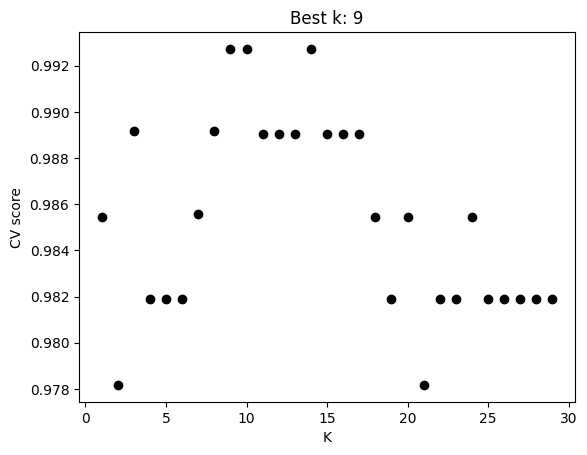

In [30]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as TTS, cross_val_score
from sklearn.metrics import accuracy_score as acc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# drop rows with missing culmen values
penguins = penguins.dropna(subset=["Culmen Length (mm)", "Culmen Depth (mm)"])

# define features and target
X = penguins[["Island_encoded", "Culmen Length (mm)", "Culmen Depth (mm)"]]
y = penguins["Species_encoded"]

# split data
X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.2, random_state=42, stratify=y)

# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# find best k using cross-validation
fig, ax = plt.subplots(1)
best_score = 0
best_k = 0
for d in range(1, 30):
    knn = KNN(n_neighbors=d)
    cv_score = cross_val_score(knn, X_train_scaled, y_train, cv=10).mean()
    ax.scatter(d, cv_score, color="black")
    if cv_score > best_score:
        best_score = cv_score
        best_k = d

ax.set(title="Best k: " + str(best_k),
       xlabel="K",
       ylabel="CV score")

# train and evaluate final model
knn = KNN(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)

# print training and testing scores
print(f"Training Data Accuracy: {train_score:.2%}")
print(f"Test Data Accuracy: {test_score:.2%}")

# predictions
y_pred = knn.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


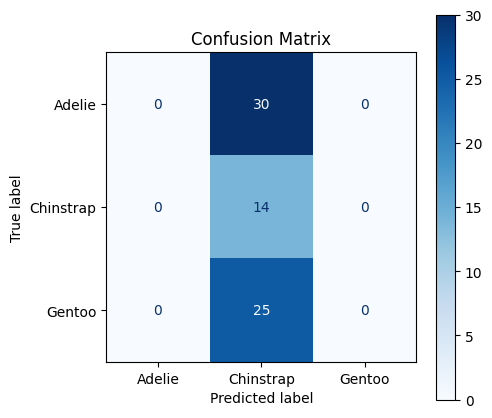

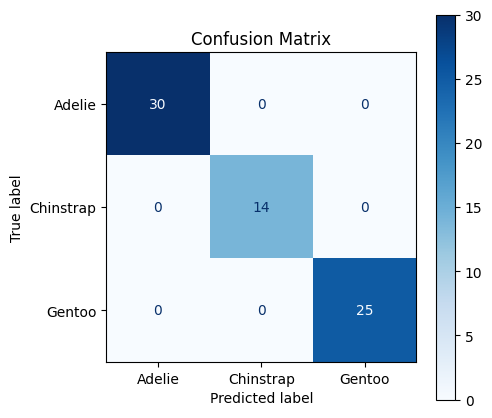

In [31]:
# display confusion matrix

# import libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# dictionary to seperate the test labels and predicted labels for both models
ML_models = {"KNN": {"y_test" : y_test, "y_pred" : knn.predict(X_test)},
            "Random Forest": {"y_test" : y_test, "y_pred" : rf_model.predict(X_test)}}


# loops through the models in the dict to create a confusion matrix for each
for name, model in ML_models.items():

  # retrieves labels
  y_test = model["y_test"]
  y_pred = model["y_pred"]
  fig, ax = plt.subplots(figsize = (5,5))

  # creates confusion matrix
  cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
  cm
  species_name = {0: "Adelie", 1: "Chinstrap", 2: "Gentoo"}
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[species_name[label]for label in np.unique(y_test)])

  # plots matrix
  disp.plot(ax=ax, cmap='Blues', values_format='d')
  ax.set_title("Confusion Matrix")


**Decision Region**

In [32]:
# plot the decision regions for each model

def plot_regions(c, X, y):
  '''
  creates decision regions for both knn and random forests models

  parameters
  -----------
  c: classifier, refers to the knn and random forest models
  X: prediction features
  y: predicted classification features

  return
  -----------
  no return value, plots decision regions for both models
  '''

  # get unique island values from the dataset
  island_unique = X['Island_encoded'].unique()

  # create subplots for each island
  fig, axes = plt.subplots(1, len(island_unique), figsize=(15, 5))

  # define species labels and colors for plotting
  species_unique = penguins['Species'].unique()
  species_name = {0: "Adelie", 1: "Chinstrap", 2: "Gentoo"}
  species_colors = {0: "blue", 1: "green", 2: "red"}
  handles = []
  labels = []

  # iterate through each island to plot decision regions
  for i, island in enumerate(island_unique):
    ax = axes[i]

    # get the island name for labeling
    Island_name = penguins[penguins['Island_encoded'] == island]['Island'].iloc[0]

    # filter data for the current island
    X_subset = X[X['Island_encoded'] == island]
    y_subset = y[X['Island_encoded'] == island]

    # extract culmen length and depth for plotting
    x0 = X_subset['Culmen Length (mm)']
    x1 = X_subset['Culmen Depth (mm)']

    # create a mesh grid over the feature space
    grid_x = np.linspace(x0.min(), x0.max(), 501)
    grid_y = np.linspace(x1.min(), x1.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    # flatten the grid for prediction
    XX = xx.ravel()
    YY = yy.ravel()

    # create a dataframe for prediction over the grid
    XY = pd.DataFrame({
        "Island_encoded": island,
        "Culmen Length (mm)": XX,
        "Culmen Depth (mm)": YY
    })

    # ensure island encoding is consistent
    XY['Island_encoded'] = island

    # predict species using the classifier
    p = c.predict(XY)
    p = p.reshape(xx.shape)

    # plot decision boundaries using contour
    ax.contourf(xx, yy, p, cmap="jet", alpha=0.2, vmin=0, vmax=2)

    # plot actual data points
    ax.scatter(x0, x1, c=y_subset, cmap="jet", vmin=0, vmax=2)
    ax.set_title(Island_name)
    ax.set_xlabel("Culmen Length (mm)")
    ax.set_ylabel("Culmen Depth (mm)")

  # create legend for species colors
  for species in species_name.keys():
    handles.append(plt.Line2D([0], [0], color=species_colors[species], lw=4))
    labels.append(species_name[species])

  # add legend and adjust layout
  fig.legend(handles, labels, loc="upper right")
  plt.tight_layout()


**KNN Decision Region**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


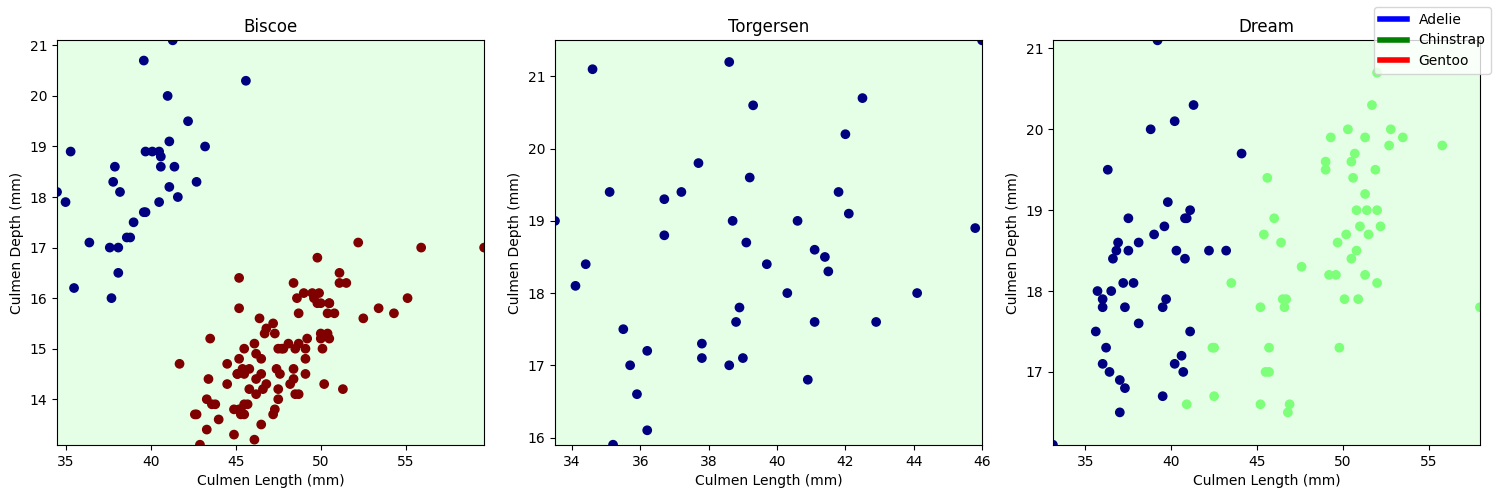

In [33]:
plot_regions(knn, X_train, y_train)

**KNN Mistake Analysis Discussion**
The KNN model performed very well with an accuracy of 98.55% on the test data. Through the confusion matrix, it also shows that there were a few misclassifications, between Adelie and Chinstrap penguins. This corresponds to the decision region graphs which have less distinctions between the two species. KNN is more sensitive to overlapping as shown in the plots. The model creates clear clusters but makes it harder when species have similar features.

**Random Forest Decision Region**


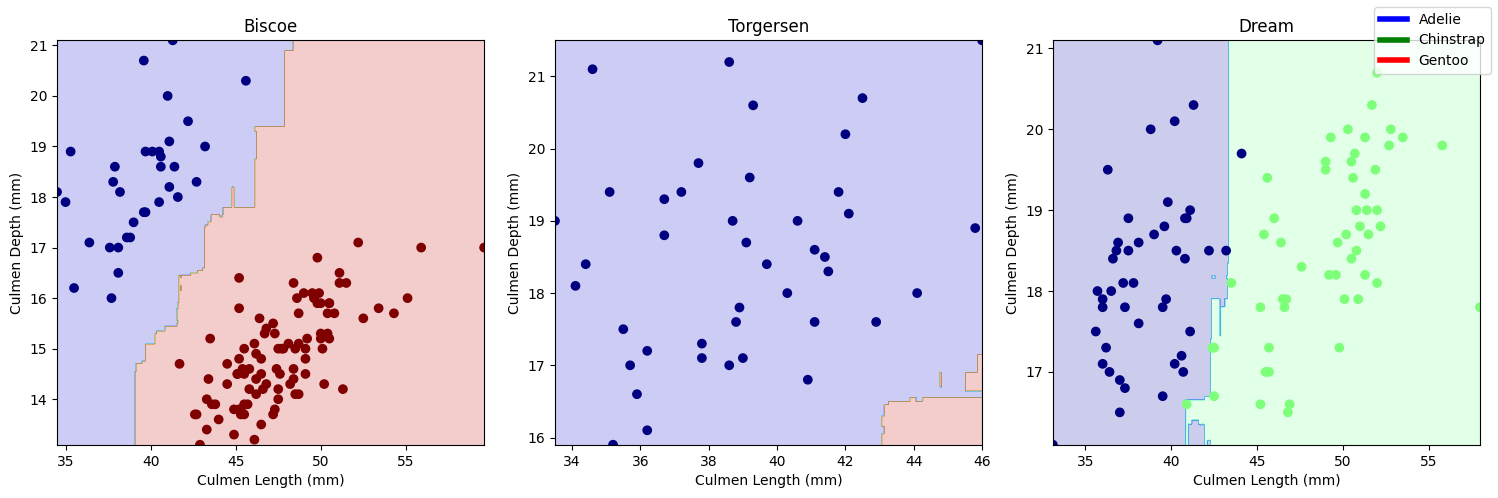

In [34]:
plot_regions(rf_model, X_train, y_train)

**Random Forests Mistake Analysis Discussion**
The Random Forest model received a very similar but slightly higher test accuracy of 98.55%, showing very few misclassifications. Most of the mistakes came from Dream Island where the species Adelie and Chinstrap have overlapping features. The decision region show a sharper decision boundary compared to KNN, especially on Biscoe Island, where Gentoo stand out. This demonstrates that Random Forest's use of multiple decision trees reduces overlap error.

### 7. Analysis of Results

Both models, KNN and Random Forests, performed well with very high test accuracy scores on the penguin species classification. However, there are still differences in how each model works to make predictions and where the errors originate.

**Random Forests Analysis**

The Random Forest model performed well by utilizing multiple decision trees. Through the combining process of these trees, it created sharper boundaries and handled complex data more effectively. This was especially evident on Biscoe Island, where Gentoo penguins were accurately distinguished from Adelie. Although some minor misclassifications occurred, they were fewer and more consistent.

**KNN Analysis**

The KNN model created more intuitive decision boundaries based on similarities in feature space. The main weakness it encountered was on Dream Island, where Adelie and Chinstrap penguins had overlapping features. This led to possible misclassification, as shown in the confusion matrix. KNN performance is sensitive to overlapping features; the clusters represented were clean and sharp, but the boundaries between Adelie and Chinstrap were not.

**Comparison of Models**

Based on the analysis, the Random Forest model appears to be more effective at classifying penguin species. It consistently produced near-accurate scores and demonstrated greater resilience to noise and overlapping features, making it more suitable for the dataset.

**Potential Improvements**

The model could be improved with additional or alternative data. The Palmer Penguins dataset consists of 151 Adelie penguins, 68 Chinstrap penguins, and 123 Gentoo penguins. This indicates an imbalance in the number of penguins sampled for each species. In particular, the number of Chinstrap penguins is less than half that of Adelie penguins, resulting in a more limited dataset for Chinstrap classification. This imbalance may have contributed to the difficulty in distinguishing between Adelie and Chinstrap penguins. With additional data on Chinstrap penguins, a more defined region could be established, allowing for improved predictions between these two species. For example, the KNN model could benefit from having more neighbors within the critical region where Chinstrap and Adelie penguins overlap, potentially leading to more accurate classification.

Furthermore, increasing the quantity of data across all species would enhance both the training and testing sets, enabling more accurate predictions by uncovering deeper patterns. KNN would be able to find better matches when identifying nearest neighbors, and Random Forests would generate more defined and accurate decision boundaries. In general, a larger dataset reduces bias and inaccuracies, as many machine learning datasets contain tens to hundreds of thousands of rows, compared to fewer than 400 in this case. Additionally, the presence of NaN values across multiple features resulted in the loss of potentially important quantitative information.

If data with additional penguin features were available, it is possible that other variables could serve as stronger identifiers of species. A broader range of qualitative and quantitative features would allow for exploration of new combinations to identify the most effective predictors.

The analysis was limited to selecting one qualitative variable and two quantitative variables. While high accuracy was achieved on unseen test data, removing these constraints would allow for exploration of different feature combinations using cross-validation to select the optimal subset. However, not all features would be utilized, as some, such as body mass and flipper length, are highly collinear, as shown in the scatter plot in Figure 4.